<a href="https://colab.research.google.com/github/lyadav44/data690_fall22/blob/main/Assignment_5/Lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Using pandas, numpy and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

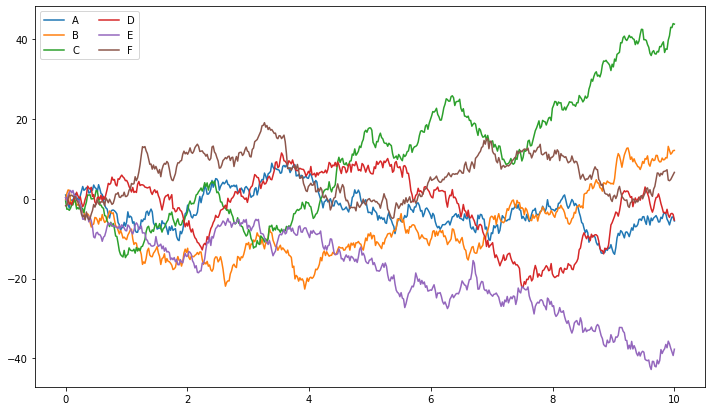

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')



## Part 3: Interacting with data


In [4]:
import requests
import pandas as pd

I have a predefined function that simplifies the process of importing data from [Cryptowatch](https://cryptowat.ch) (for reference, check [their docs](https://cryptowat.ch/docs/api#ohlc)).

In [5]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [6]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-09-25 22:41:48.926322')

In [7]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [8]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

**Bitcoin:**

In [9]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 23:00:00,18742,18902,18636,18792,187.846590,3.522637e+06
2022-09-26 00:00:00,18781,18841,18739,18810,55.138476,1.036345e+06
2022-09-26 01:00:00,18809,18929,18747,18769,76.063839,1.432279e+06
2022-09-26 02:00:00,18766,18911,18721,18873,106.202344,1.997512e+06
2022-09-26 03:00:00,18885,18933,18845,18850,53.483875,1.010444e+06


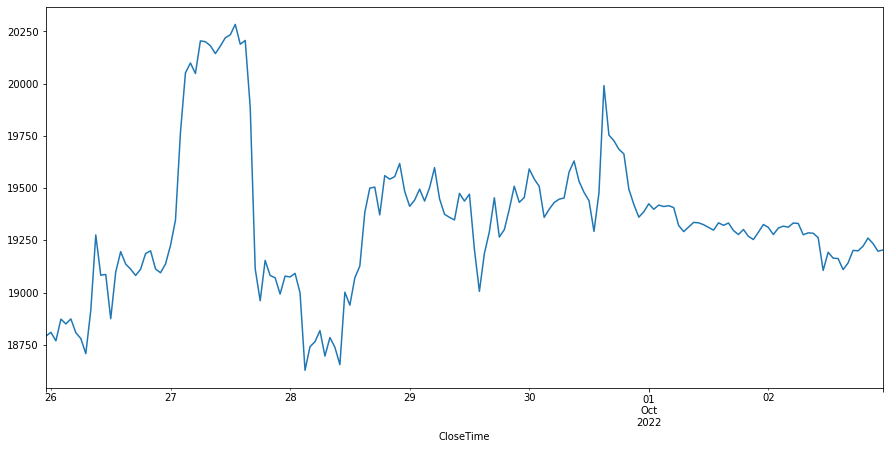

In [10]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [11]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 23:00:00,1285.6,1302.9,1270.0,1291.0,1523.950140,1.965608e+06
2022-09-26 00:00:00,1290.7,1300.0,1288.7,1292.6,775.401655,1.003705e+06
2022-09-26 01:00:00,1295.5,1311.2,1290.6,1292.2,1120.278363,1.459183e+06
2022-09-26 02:00:00,1292.5,1307.4,1287.0,1301.5,1678.429339,2.177306e+06
2022-09-26 03:00:00,1301.4,1308.7,1299.4,1304.3,1019.466391,1.329638e+06


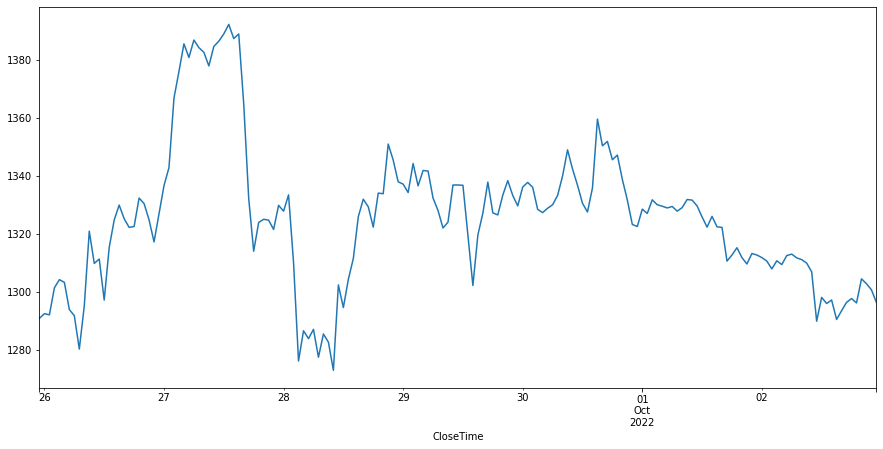

In [12]:
eth['ClosePrice'].plot(figsize=(15, 7))

As you can see, we're able to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Lab.

In [13]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 23:00:00,1285.6,1302.9,1270.0,1291.0,1523.950140,1.965608e+06
2022-09-26 00:00:00,1290.7,1300.0,1288.7,1292.6,775.401655,1.003705e+06
2022-09-26 01:00:00,1295.5,1311.2,1290.6,1292.2,1120.278363,1.459183e+06
2022-09-26 02:00:00,1292.5,1307.4,1287.0,1301.5,1678.429339,2.177306e+06
2022-09-26 03:00:00,1301.4,1308.7,1299.4,1304.3,1019.466391,1.329638e+06




### Dynamic plots with Bokeh


In [14]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [15]:
output_notebook()

And we generate the plot:

In [16]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

☝️ as you can see, the plot is interactive. Try zomming in and out, and scrolling in the plot.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Part 4: Exporting to Excel


In [17]:
#using pandas Excelwrite to export the excel file
writer = pd.ExcelWriter('cryptos.xlsx')

writing both our Bitcoin and Ether data as separate sheets:

In [18]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [19]:
eth.to_excel(writer, sheet_name='Ether')

saving the file:

In [20]:
writer.save()